#### 타이타닉 생존자 ML 예측 구현 ( 실습 0 
 - 데이터 전처리 ( null처리 , 불필요한 속성 제거, 인코딩 수행 ) 
 - 모델 학습 및 검증 / 예측 / 평가 

In [1]:
import numpy as np
import pandas as pd 

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier # 나름 강력한 결정트리 모델 
from   sklearn.linear_model    import LogisticRegression   # 회귀라기보다는 분류로 본다라..


from   sklearn.metrics         import accuracy_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from   sklearn.impute          import SimpleImputer





In [2]:
titanic = pd.read_csv('./ml-data/titanic_train.csv')
titanic_frm = pd.DataFrame(titanic)
titanic_frm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_frm.isnull().sum()  # null 결측값을 처리해야한다. 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print('02 결측값 처리 - Age 평균 , CAabin Embarked -> N ')
print('missingnno 확인 및 처리')
print('Simpleinputer 사용가능')

02 결측값 처리 - Age 평균 , CAabin Embarked -> N 
missingnno 확인 및 처리
Simpleinputer 사용가능


<AxesSubplot:>

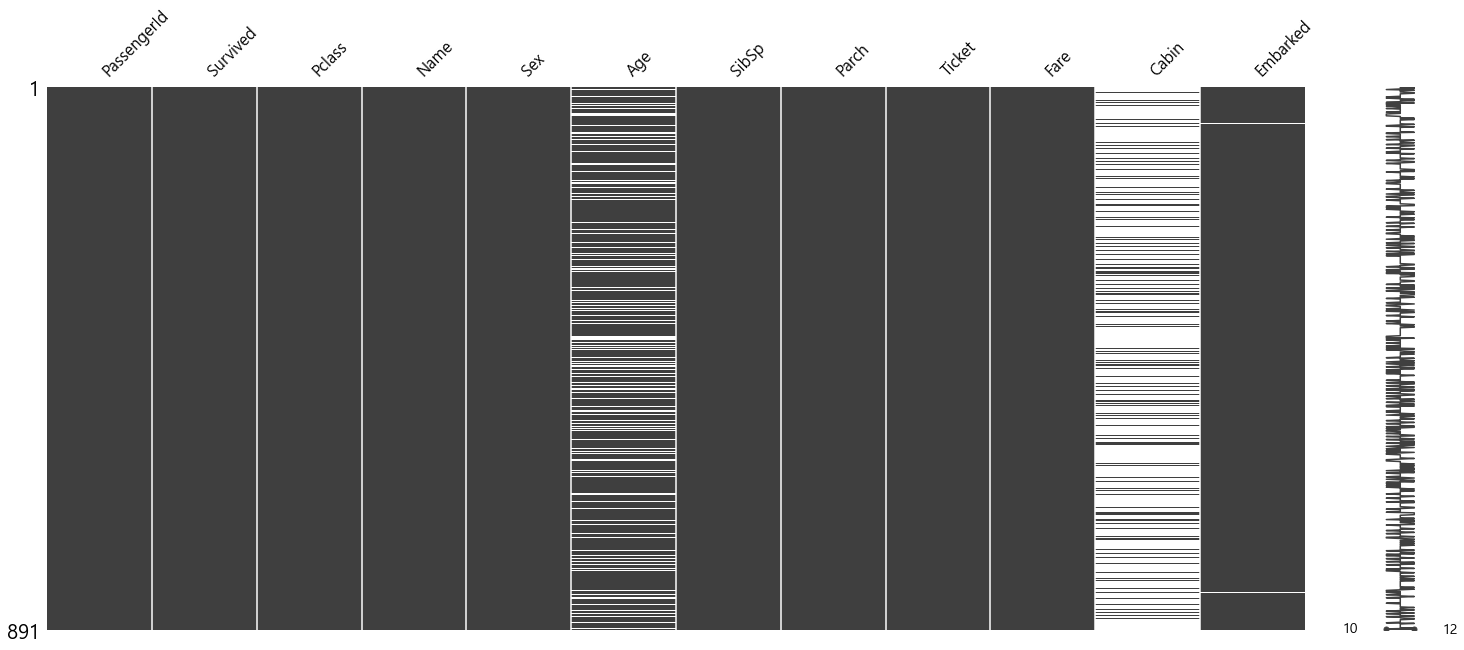

In [6]:
msno.matrix(titanic_frm)

In [7]:
titanic_frm['Age'] = SimpleImputer(strategy='mean').fit_transform(titanic_frm[['Age']])

In [8]:
titanic_frm['Cabin']= titanic_frm['Cabin'].fillna('N')
titanic_frm['Embarked']= titanic_frm['Embarked'].fillna('N')

In [9]:
print('성별에 따른 생존여부 확인을 위한 barplot 시각화 ')
print('성별에 따른 시각화 , 성별에 따른 선실별 , 성별에 따른 선실별 그룹과 누적 ')
print('subplot - 1,3')

성별에 따른 생존여부 확인을 위한 barplot 시각화 
성별에 따른 시각화 , 성별에 따른 선실별 , 성별에 따른 선실별 그룹과 누적 
subplot - 1,3


In [10]:
titanic_frm.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


스타일 테마 적용 가능 - darkgrid , whitegrid , dark , white , ticks 


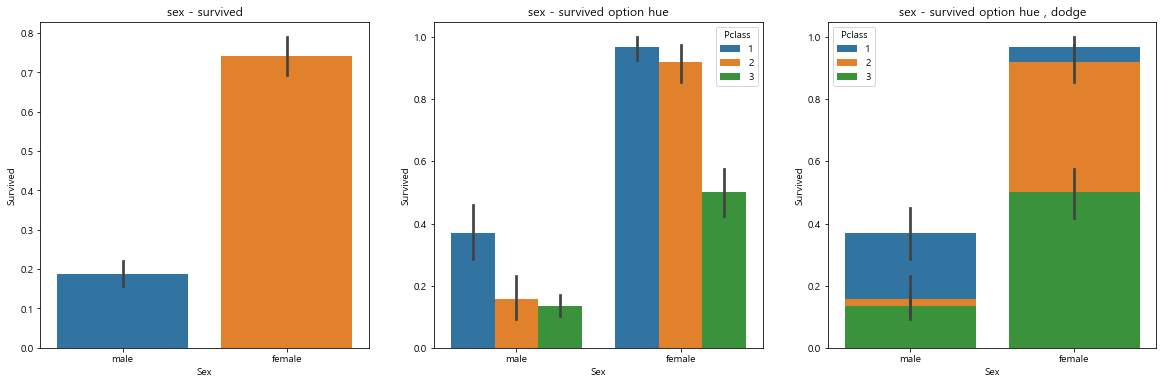

In [11]:
print('스타일 테마 적용 가능 - darkgrid , whitegrid , dark , white , ticks ')

fig = plt.figure( figsize = (20, 6))

ax01 = fig.add_subplot(1,3,1)
ax02 = fig.add_subplot(1,3,2)
ax03 = fig.add_subplot(1,3,3)

ax01.set_title('sex - survived')
ax02.set_title('sex - survived option hue')
ax03.set_title('sex - survived option hue , dodge')

sns.barplot(ax = ax01 , data = titanic_frm , x = 'Sex' , y='Survived')
sns.barplot(ax = ax02 , data = titanic_frm , x = 'Sex' , y='Survived' , hue = 'Pclass')
sns.barplot(ax = ax03 , data = titanic_frm , x = 'Sex' , y='Survived' , hue = 'Pclass' , dodge = False)

plt.show()
plt.close()

In [12]:
print('EDA')
print('04. 성별에 따른 생존여부 확인을 위한 countplot , pie 시각화 (seaborn) - ')
print('성별에 따른 시각화 -')
print('subplot - (1,2)')



EDA
04. 성별에 따른 생존여부 확인을 위한 countplot , pie 시각화 (seaborn) - 
성별에 따른 시각화 -
subplot - (1,2)


스타일 테마 적용 가능 - darkgrid , whitegrid , dark , white , ticks 


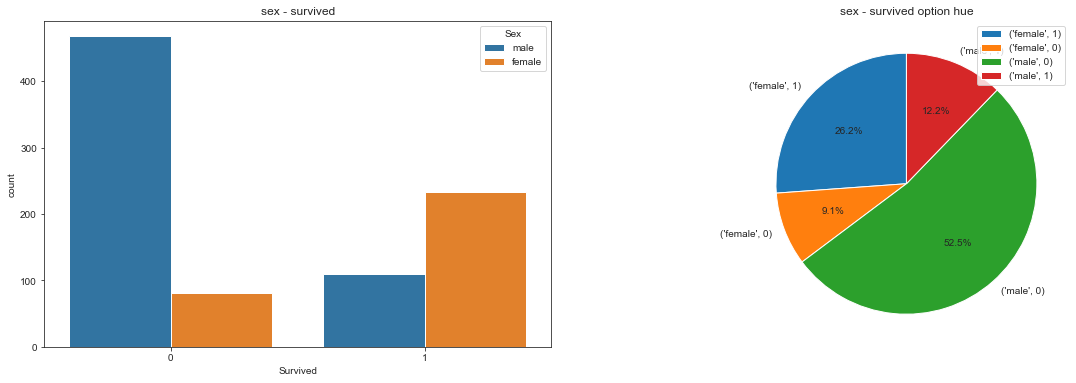

In [13]:
print('스타일 테마 적용 가능 - darkgrid , whitegrid , dark , white , ticks ')

sns.set_style('ticks')


fig = plt.figure( figsize = (20, 6))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)


ax01.set_title('sex - survived')
ax02.set_title('sex - survived option hue')

sns.countplot(ax = ax01 , data = titanic_frm , x = 'Survived' , hue = 'Sex')
ax02.pie(titanic_frm.groupby('Sex')['Survived'].value_counts(),
        labels = titanic_frm.groupby('Sex')['Survived'].value_counts().index,
        autopct = '%1.1f%%',
        startangle=90)
plt.legend(loc='best')

plt.show()
plt.close()

In [14]:
# 성별에 따른 생존자 수를 수치로 비교 - groupby 

titanic_frm.groupby(['Sex' , 'Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [15]:
print('04 age , cabin .embarked 값의 분포 values_counts()')


04 age , cabin .embarked 값의 분포 values_counts()


In [16]:
# 05 Cabin에서  첫번째 글자가 좌석등급을 의미하므로 첫번째 글자만 추출해보자. 

In [17]:
titanic_frm['Cabin'] = titanic_frm['Cabin'].str[0:1]
titanic_frm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [18]:
titanic_frm['Age_Category'] = (titanic_frm['Age'] // 10 ) * 10


In [19]:
print('bar-plot 연령대에 따른 성별 생존 확률 시각화 ')

bar-plot 연령대에 따른 성별 생존 확률 시각화 


<AxesSubplot:xlabel='Age_Category', ylabel='Survived'>

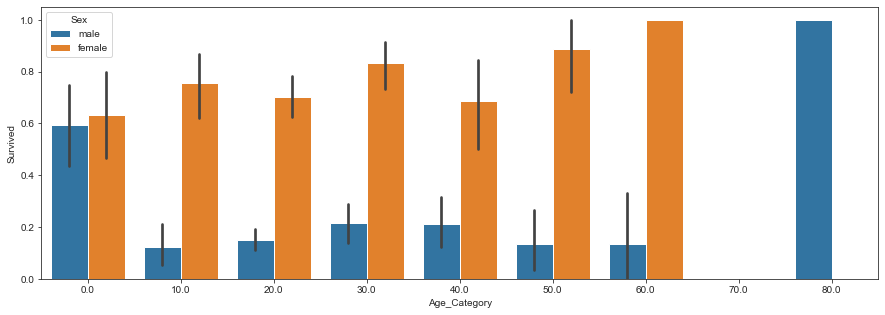

In [20]:
fig = plt.figure(figsize=(15,5))

sns.barplot(data = titanic_frm ,
           x = 'Age_Category',
           y= 'Survived',
           hue = 'Sex')

In [21]:
titanic_subset_frm = titanic_frm[['Survived' , 'Pclass' , 'Sex' , 'Age_Category' , 'Cabin' , 'Embarked']]
titanic_subset_frm

,Survived,Pclass,Sex,Age_Category,Cabin,Embarked
0,0,3,male,20.0,N,S
1,1,1,female,30.0,C,C
2,1,3,female,20.0,N,S
3,1,1,female,30.0,C,S
4,0,3,male,30.0,N,S
...,...,...,...,...,...,...
886,0,2,male,20.0,N,S
887,1,1,female,10.0,B,S
888,0,3,female,20.0,N,S
889,1,1,male,20.0,C,C


In [22]:
# 08. 전처리 인코딩 : Sex, Cabin , Embarked 
# LabelEncoder().fit_transfrom()

In [25]:
encoder = LabelEncoder()
titanic_subset_frm['Sex'] = encoder.fit_transform(titanic_subset_frm['Sex'])
titanic_subset_frm['Cabin'] =encoder.fit_transform(titanic_subset_frm['Cabin'])
titanic_subset_frm['Embarked'] =encoder.fit_transform(titanic_subset_frm['Embarked'])


# 이건 코드가 좀 ; 

In [26]:
titanic_subset_frm

,Survived,Pclass,Sex,Age_Category,Cabin,Embarked
0,0,3,1,20.0,7,3
1,1,1,0,30.0,2,0
2,1,3,0,20.0,7,3
3,1,1,0,30.0,2,3
4,0,3,1,30.0,7,3
...,...,...,...,...,...,...
886,0,2,1,20.0,7,3
887,1,1,0,10.0,1,3
888,0,3,0,20.0,7,3
889,1,1,1,20.0,2,0


In [136]:
def feature_encoder(df) : 
    features = [ Sex, Cabin, Embarked ] 
    
    for f in features : 
        le = LabelEncoder()
        le = le.fit(df[f])
        df[f] = le.transform(df[f])
    return df 

In [137]:
clean_data = feature_encoder(titanic_subset_frm)
clean_data # 왜 안되지 ? -_ 

NameError: name 'Sex' is not defined

 - feaure , target 
 - Estimator 선정 
 - 학습 , 예측 , 평가
 - 교차검증 추가 ,하이퍼 파라미터 튜닝 
 - 피처 중요도 확인 

In [109]:
params = {'max_depth' : [2,3,5,10],
         'min_samples_split' : [2,3,5],
         'min_samples_leaf':[1,5,8]}

params02 = {
    'criterion' : ['gini' , 'entropy'],
    'splitter' : ['best' , 'random'], # spllitter라고 했다. 오타 주의 
    'max_depth' : [1,2,3] , 
    'min_samples_split' : [2, 3 ]
}

params_log =  {'penalty' : 12 , 
               'dual' : False,
               'fit_intercept' : True,
               'class_weight' : None,
                              }

params_log02={ "penalty":["l1","l2"]}# l1 lasso l2 ridge

In [152]:
#1 Decisionclasfier()  표준화 모델 
X_train , X_test , y_train , y_test = train_test_split(titanic_subset_frm.iloc[:,1:] , titanic_subset_frm.iloc[:, :1],
                                                       test_size=0.2  , shuffle=True ) 


s_scale = StandardScaler()
s_scale.fit(X_train)

s_train_data = s_scale.transform(X_train)
s_test_data = s_scale.transform(X_test)

titanic_model = DecisionTreeClassifier()
titanic_model.fit(s_train_data , y_train)

grid_titanic_model = GridSearchCV(titanic_model ,  param_grid=params , scoring='accuracy' , cv=5)
grid_titanic_model.fit(s_train_data, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [153]:
grid_titanic_model.best_estimator_
grid_titanic_model.predict(s_test_data)
accuracy = accuracy_score(y_test, grid_titanic_model.predict(s_test_data))


print('정확도 : ' , np.round(accuracy,2), '%')

정확도 :  0.79 %


In [154]:
# 랜덤 포레스트 표준화 모델 
titanic_model = RandomForestClassifier()
titanic_model.fit(s_train_data , y_train)

grid_titanic_model = GridSearchCV(titanic_model ,  param_grid=params , scoring='accuracy' , cv=5)
grid_titanic_model.fit(s_train_data, y_train)
grid_titanic_model.best_estimator_
grid_titanic_model.predict(s_test_data)

accuracy = accuracy_score(y_test, grid_titanic_model.predict(s_test_data))

print('정확도 : ' , np.round(accuracy,2), '%')



정확도 :  0.82 %


In [155]:
score_titanic_frm = pd.DataFrame(grid_titanic_model.cv_results_)
score_titanic_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131988,0.004143,0.012367,0.001850,2,1,2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.811189,0.776224,0.774648,0.809859,0.802817,0.794947,0.016191,30
1,0.139638,0.008136,0.014361,0.007399,2,1,3,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.811189,0.797203,0.788732,0.816901,0.760563,0.794918,0.019858,32
2,0.135072,0.003669,0.011378,0.002739,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.811189,0.797203,0.781690,0.823944,0.760563,0.794918,0.022216,31
3,0.135008,0.008670,0.011772,0.001322,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.832168,0.797203,0.781690,0.830986,0.802817,0.808973,0.019715,15
4,0.143156,0.011240,0.010408,0.001337,2,5,3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.818182,0.769231,0.788732,0.816901,0.760563,0.790722,0.023727,36
5,0.138429,0.007400,0.012185,0.002493,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.811189,0.797203,0.774648,0.802817,0.802817,0.797735,0.012377,29
6,0.123833,0.006661,0.013169,0.003642,2,8,2,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.804196,0.769231,0.774648,0.816901,0.802817,0.793559,0.018402,33
7,0.123010,0.002303,0.010010,0.001111,2,8,3,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.811189,0.797203,0.788732,0.802817,0.760563,0.792101,0.017385,35
8,0.125871,0.004821,0.010090,0.002069,2,8,5,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.811189,0.762238,0.774648,0.816901,0.802817,0.793559,0.021354,33
9,0.134825,0.010752,0.011210,0.001156,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.839161,0.769231,0.795775,0.823944,0.802817,0.806185,0.024034,19


In [156]:
# LogisticRegression param 값을 알수가 없어서 그런듯 하다. 
# log자체가 이미 정규화를하는데 들어가는데이터가 정규화되버리면서 더 의미가 없어진듯 


X_train , X_test , y_train , y_test = train_test_split(titanic_subset_frm.iloc[:,1:] , titanic_subset_frm.iloc[:, :1],
                                                       test_size=0.2  , shuffle=True ) 

titanic_model = LogisticRegression()
titanic_model.fit(X_train , y_train)

grid_titanic_model = GridSearchCV(titanic_model ,  param_grid=params_log02 , scoring='accuracy' , cv=5 , refit = True)
grid_titanic_model.fit(X_train, y_train)
grid_titanic_model.best_estimator_
grid_titanic_model.predict(X_train)

accuracy = accuracy_score(y_test, grid_titanic_model.predict(X_test))

print('정확도 : ' , np.round(accuracy,2))
print('정답 : ', y_test.values.reshape(1,-1)) 
print('예측 : ', y_pred)

정확도 :  0.79
정답 :  [[0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1
  0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
  1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1
  0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0
  1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1]]
예측 :  [0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [157]:
score_titanic_frm = pd.DataFrame(grid_titanic_model.cv_results_)
score_titanic_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000997,0.000630,0.000000,0.000000,l1,{'penalty': 'l1'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,0.015758,0.001163,0.002593,0.002239,l2,{'penalty': 'l2'},0.804196,0.769231,0.78169,0.78169,0.788732,0.785108,0.011427,1


In [ ]:
sns.barplot(x=)